PARCIAL 2 

VISUALIZACION COMUNIDADES (ALGORITMO DE LOUVAIN)

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import linalg as LA
import random
import networkx as nx
import pandas as pd

In [4]:
df= pd.read_csv("World.csv")
df.head()

,Origen,Destino,ConexionAeropuertos
0,Papua New Guinea,Australia,19
1,Papua New Guinea,Philippines,5
2,Papua New Guinea,Indonesia,2
3,Papua New Guinea,Solomon Islands,2
4,Papua New Guinea,Hong Kong,2


In [5]:
flights_graph = nx.from_pandas_edgelist(df, source= "Origen",target= "Destino")

In [6]:
print(flights_graph)

Graph with 229 nodes and 2852 edges


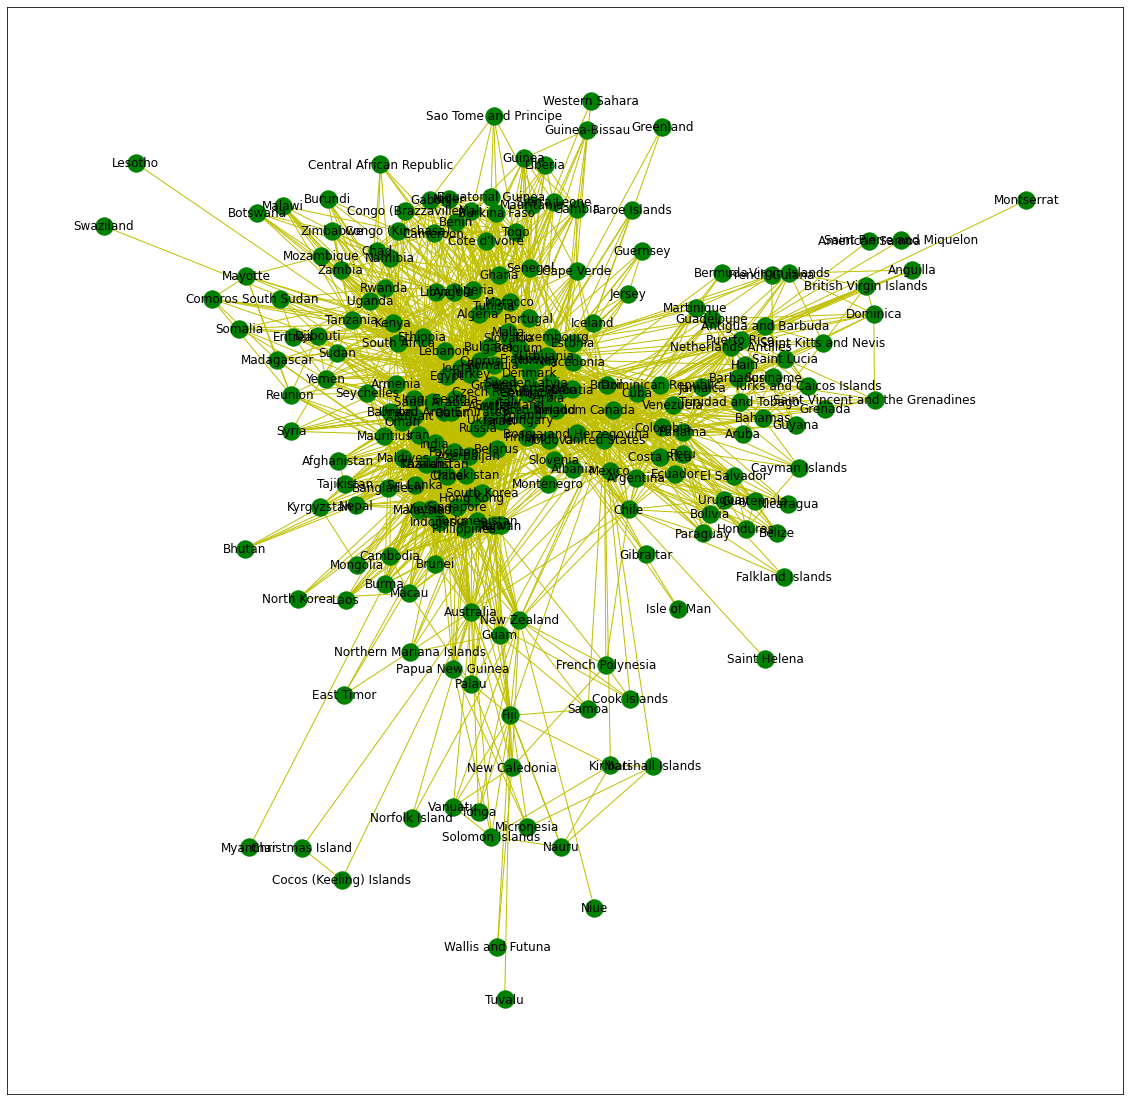

In [7]:
plt.figure(figsize=(20,20))
nx.draw_networkx(flights_graph, with_labels = True, node_color= 'g', edge_color='y')


In [8]:
import networkx.algorithms.community as nx_comm
communities= nx_comm.louvain_communities(flights_graph, seed=123)
print("Cantidad de comunidades detectadas:",len(communities))

Cantidad de comunidades detectadas: 4


In [9]:
for i in range(len(communities)):
    print("Comunidad ------>",i,":\n",communities[i])

Comunidad ------> 0 :
 {'Reunion', 'Swaziland', 'South Africa', 'Niger', 'Morocco', 'Eritrea', 'Burkina Faso', 'Ethiopia', 'Sao Tome and Principe', 'Zimbabwe', 'Chad', 'Mauritius', 'Ghana', 'South Sudan', 'Libya', 'Kenya', 'Gambia', 'Angola', 'Central African Republic', 'Tunisia', 'Rwanda', 'Gibraltar', 'Liberia', 'Malawi', 'Nigeria', 'Burundi', 'Tanzania', 'Sudan', 'Mali', 'Algeria', 'Yemen', 'Seychelles', 'Cameroon', 'Comoros', 'Senegal', 'Uganda', 'Namibia', 'Benin', 'Congo (Brazzaville)', 'Guinea', 'Togo', 'Djibouti', 'Zambia', 'Turkey', 'Congo (Kinshasa)', 'Lesotho', 'Madagascar', 'Equatorial Guinea', 'France', 'Cape Verde', 'Botswana', 'Mauritania', 'Mayotte', "Cote d'Ivoire", 'Guinea-Bissau', 'Gabon', 'Western Sahara', 'Somalia', 'Mozambique', 'Sierra Leone'}
Comunidad ------> 1 :
 {'Israel', 'Serbia', 'Croatia', 'Isle of Man', 'Norway', 'Poland', 'Sweden', 'Latvia', 'Finland', 'Albania', 'Lithuania', 'Slovakia', 'Austria', 'Czech Republic', 'Cyprus', 'Switzerland', 'Belgium', '

In [10]:
for i in range(len(communities)):
    print("Cantidad de nodos en la comunidad -------->",i,":",len(communities[i]))

Cantidad de nodos en la comunidad --------> 0 : 60
Cantidad de nodos en la comunidad --------> 1 : 51
Cantidad de nodos en la comunidad --------> 2 : 54
Cantidad de nodos en la comunidad --------> 3 : 64


In [11]:
def visualizar_comunidades(community, number, node_color):
    G=nx.Graph()
    G=flights_graph.subgraph(list(community))
    print("Visualizacion Comunidad:",number,"\n")
    plt.figure(figsize=(20,20))
    nx.draw_networkx(G, with_labels = True, node_color= node_color, edge_color='m')

Visualizacion Comunidad: 0 



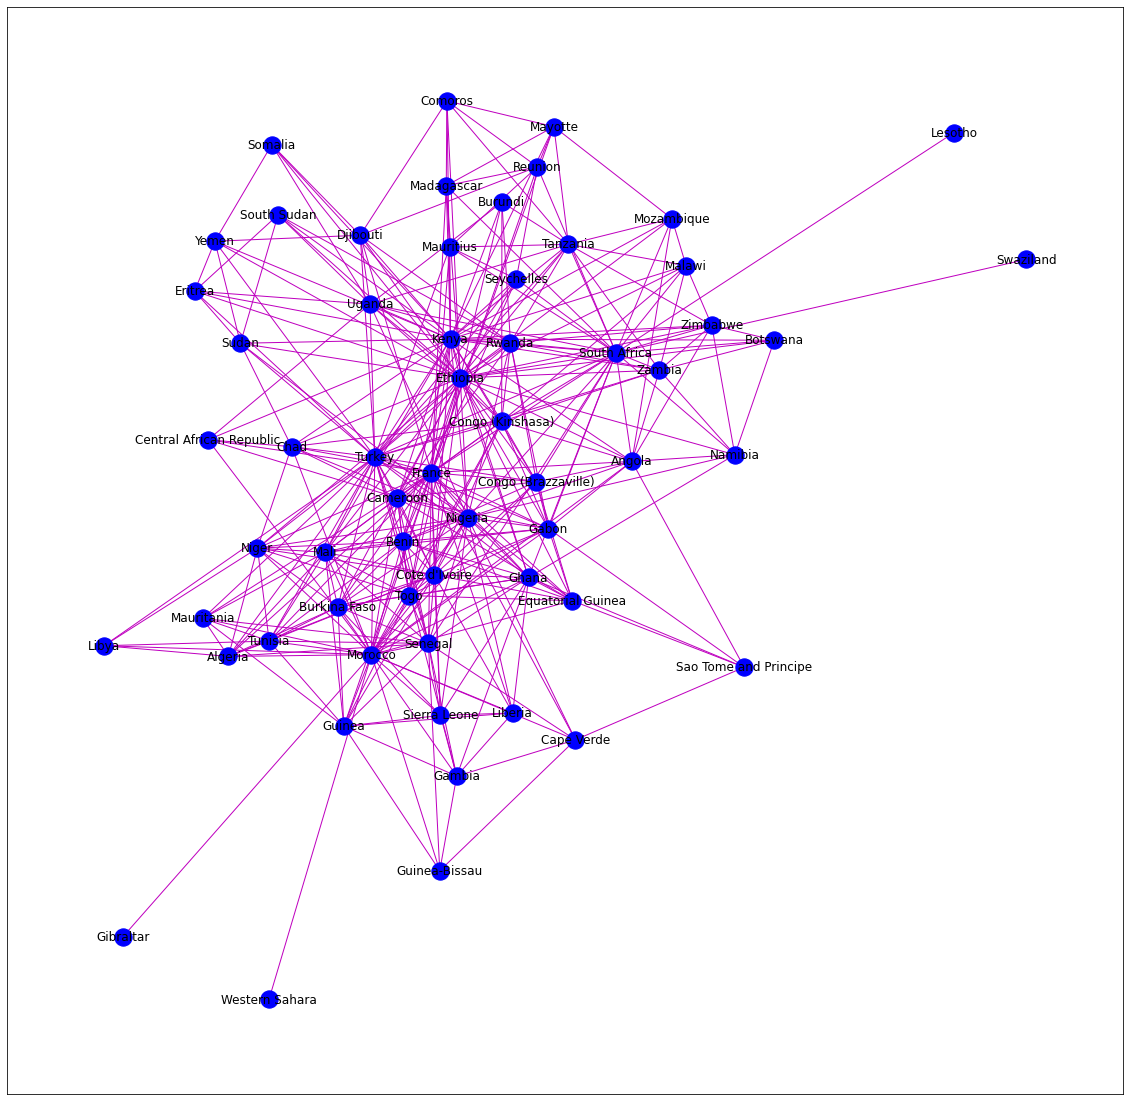

In [12]:
visualizar_comunidades(communities[0],0,'b')

Visualizacion Comunidad: 1 



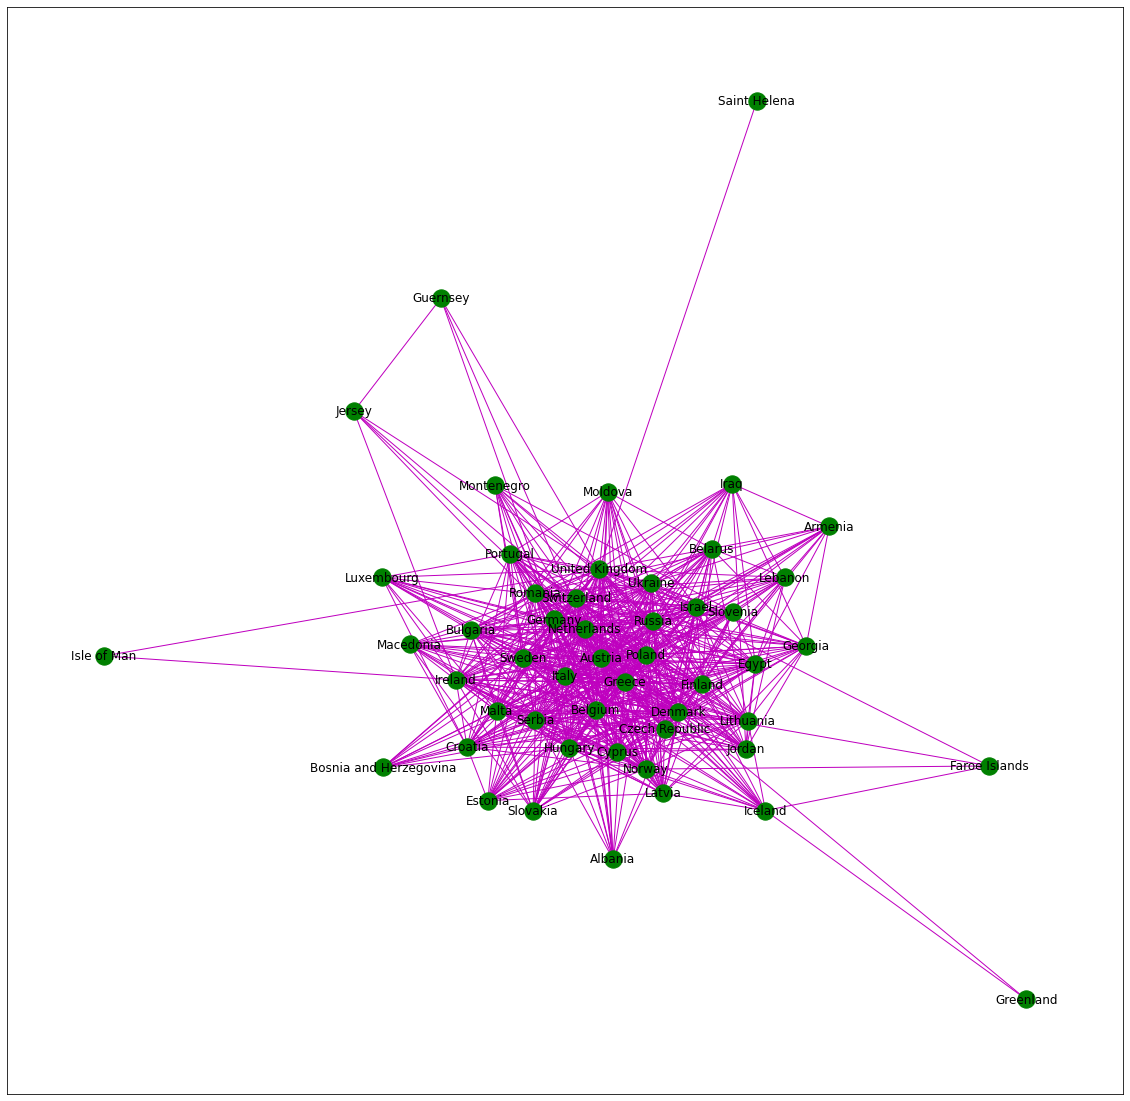

In [13]:
visualizar_comunidades(communities[1],1,'g')

Visualizacion Comunidad: 2 



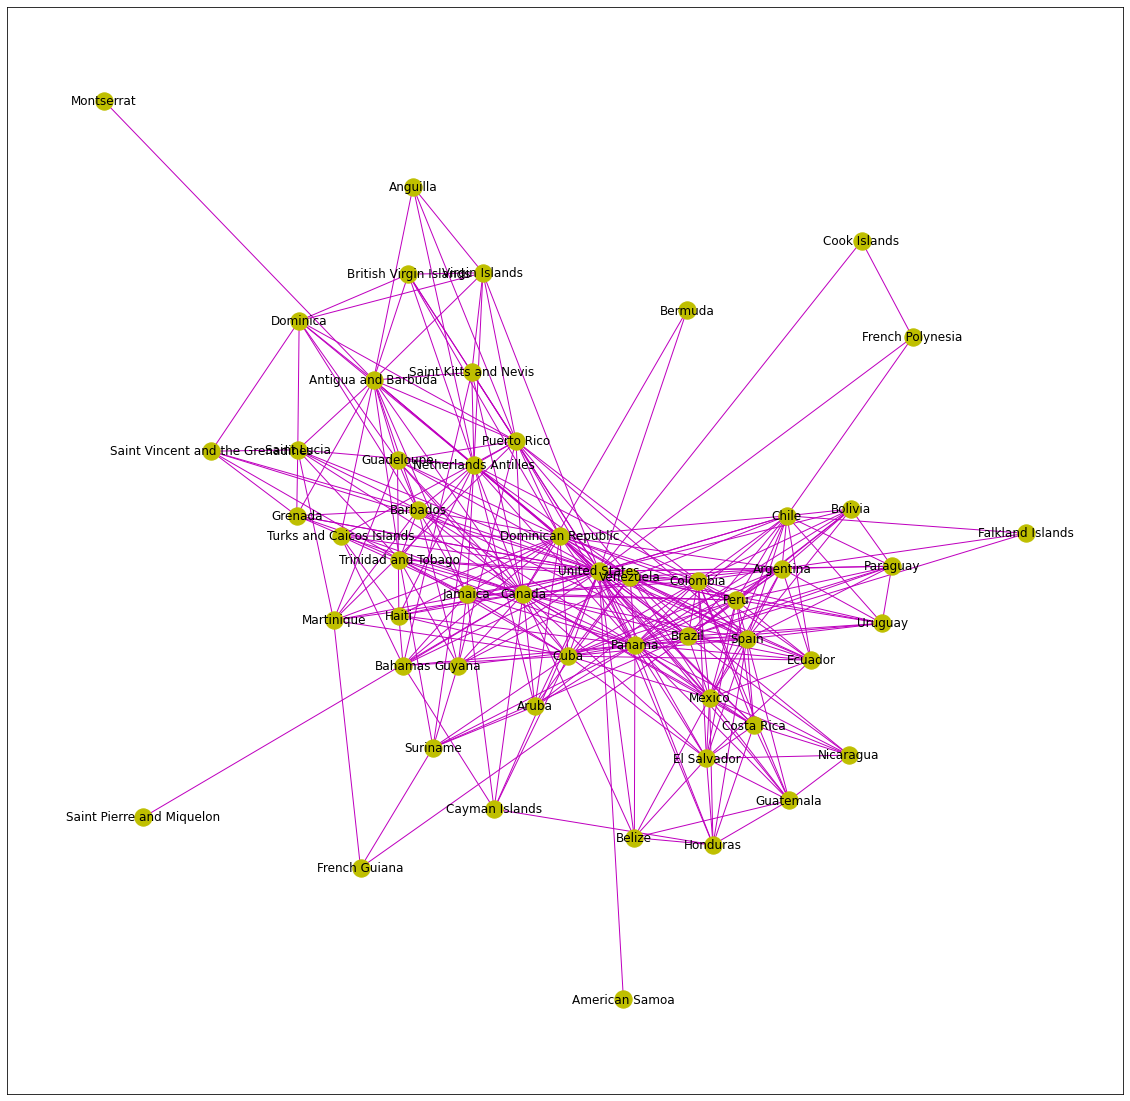

In [14]:
visualizar_comunidades(communities[2],2,'y')

Visualizacion Comunidad: 3 



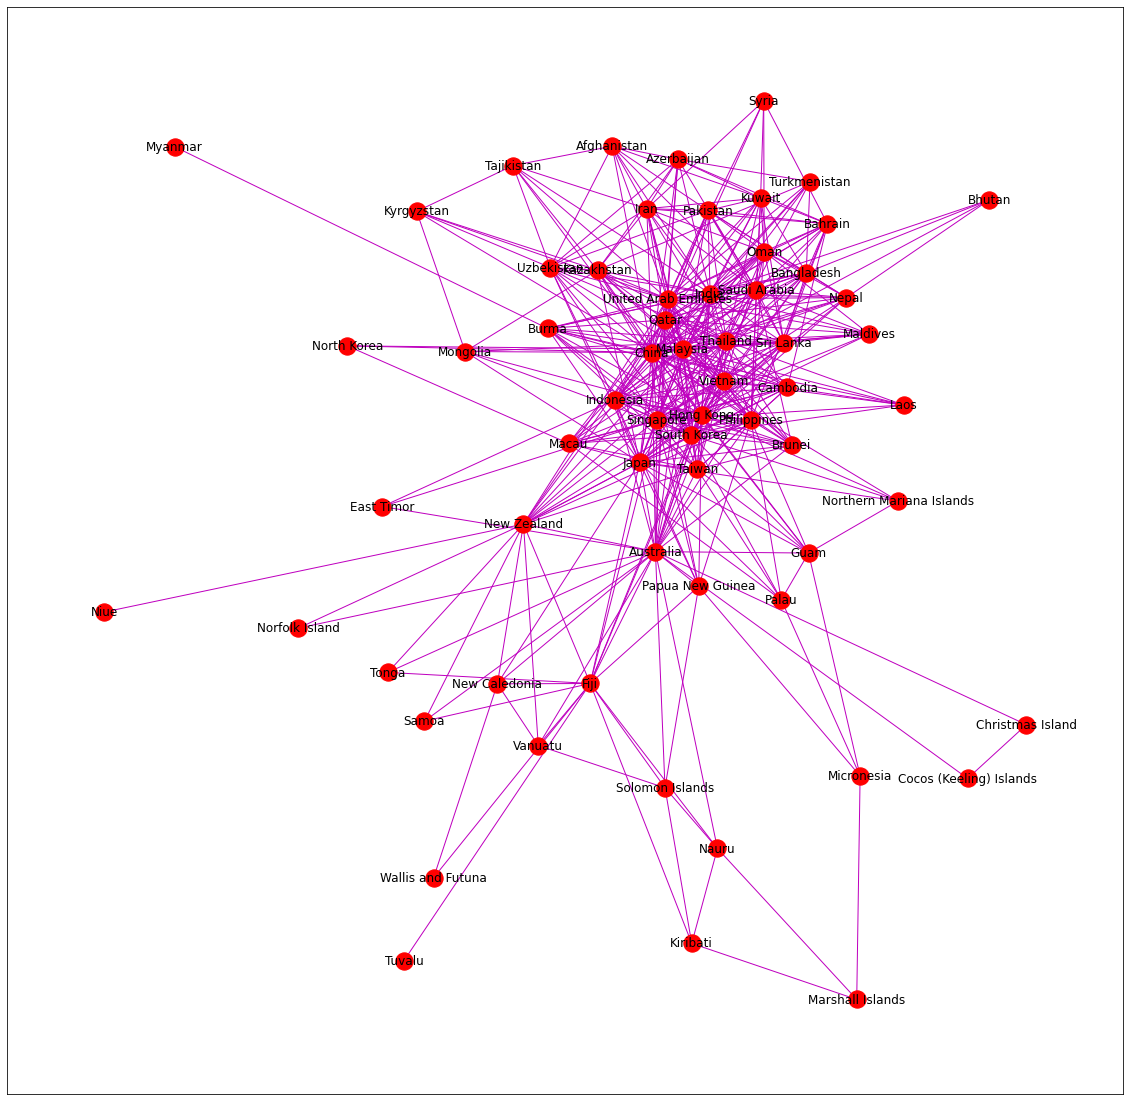

In [15]:
visualizar_comunidades(communities[3],3,'r')

In [16]:
def aristas_que_cruzan(communitie, G):
    total=0
    nodo_actual=0
    vecinos = []
    subgraph=nx.Graph()
    subgraph= flights_graph.subgraph(list(communitie))
    for i in range(len(communitie)):
        nodo_actual= communitie[i]
        vecinos = list(G.neighbors(nodo_actual))
        for j in range(len(vecinos)):
            if not subgraph.has_node(vecinos[j]) :
                total= total +1
                
        
    return total

In [17]:
sum=0
for i in range(len(communities)):    
    print("Cantidad de aristas que cruzan de la comunidad",i,"-------->",aristas_que_cruzan(list(communities[i]), flights_graph))
    sum = sum +(aristas_que_cruzan(list(communities[i]), flights_graph))
print("Cantidad total de aristas que cruzan -------->",sum/2)    

Cantidad de aristas que cruzan de la comunidad 0 --------> 488
Cantidad de aristas que cruzan de la comunidad 1 --------> 747
Cantidad de aristas que cruzan de la comunidad 2 --------> 295
Cantidad de aristas que cruzan de la comunidad 3 --------> 546
Cantidad total de aristas que cruzan --------> 1038.0


SUBCOMUNIDADES 

SUBCOMUNIDAD ----> Proveniente de SUBRED : COMUNIDAD 0

In [33]:
subgraph=nx.Graph()
subgraph= flights_graph.subgraph(list(communities[0]))
sub_communities= nx_comm.louvain_communities(subgraph, seed=123)
print("Cantidad de sub comunidades detectadas:",len(sub_communities))

Cantidad de sub comunidades detectadas: 3


In [19]:
for i in range(len(sub_communities)):
    print("Comunidad ------>",i,":\n",sub_communities[i])

Comunidad ------> 0 :
 {'Cameroon', 'Morocco', 'Niger', 'Burkina Faso', 'Sao Tome and Principe', 'Senegal', 'Ghana', 'Benin', 'Congo (Brazzaville)', 'Guinea', 'Togo', 'Gambia', 'Libya', 'Turkey', 'Equatorial Guinea', 'Cape Verde', 'Algeria', 'Tunisia', 'Mauritania', 'Gibraltar', "Cote d'Ivoire", 'Liberia', 'Guinea-Bissau', 'Gabon', 'Nigeria', 'Western Sahara', 'Mali', 'Sierra Leone'}
Comunidad ------> 1 :
 {'Swaziland', 'Yemen', 'South Africa', 'Ethiopia', 'Eritrea', 'Zimbabwe', 'Uganda', 'Chad', 'Namibia', 'South Sudan', 'Kenya', 'Djibouti', 'Zambia', 'Congo (Kinshasa)', 'Lesotho', 'Angola', 'Central African Republic', 'Botswana', 'Rwanda', 'Malawi', 'Burundi', 'Tanzania', 'Somalia', 'Sudan', 'Mozambique'}
Comunidad ------> 2 :
 {'Reunion', 'France', 'Seychelles', 'Mauritius', 'Comoros', 'Mayotte', 'Madagascar'}


In [20]:
for i in range(len(sub_communities)):
    print("Cantidad de nodos en la comunidad -------->",i,":",len(sub_communities[i]))

Cantidad de nodos en la comunidad --------> 0 : 28
Cantidad de nodos en la comunidad --------> 1 : 25
Cantidad de nodos en la comunidad --------> 2 : 7


Visualizacion Comunidad: 0 



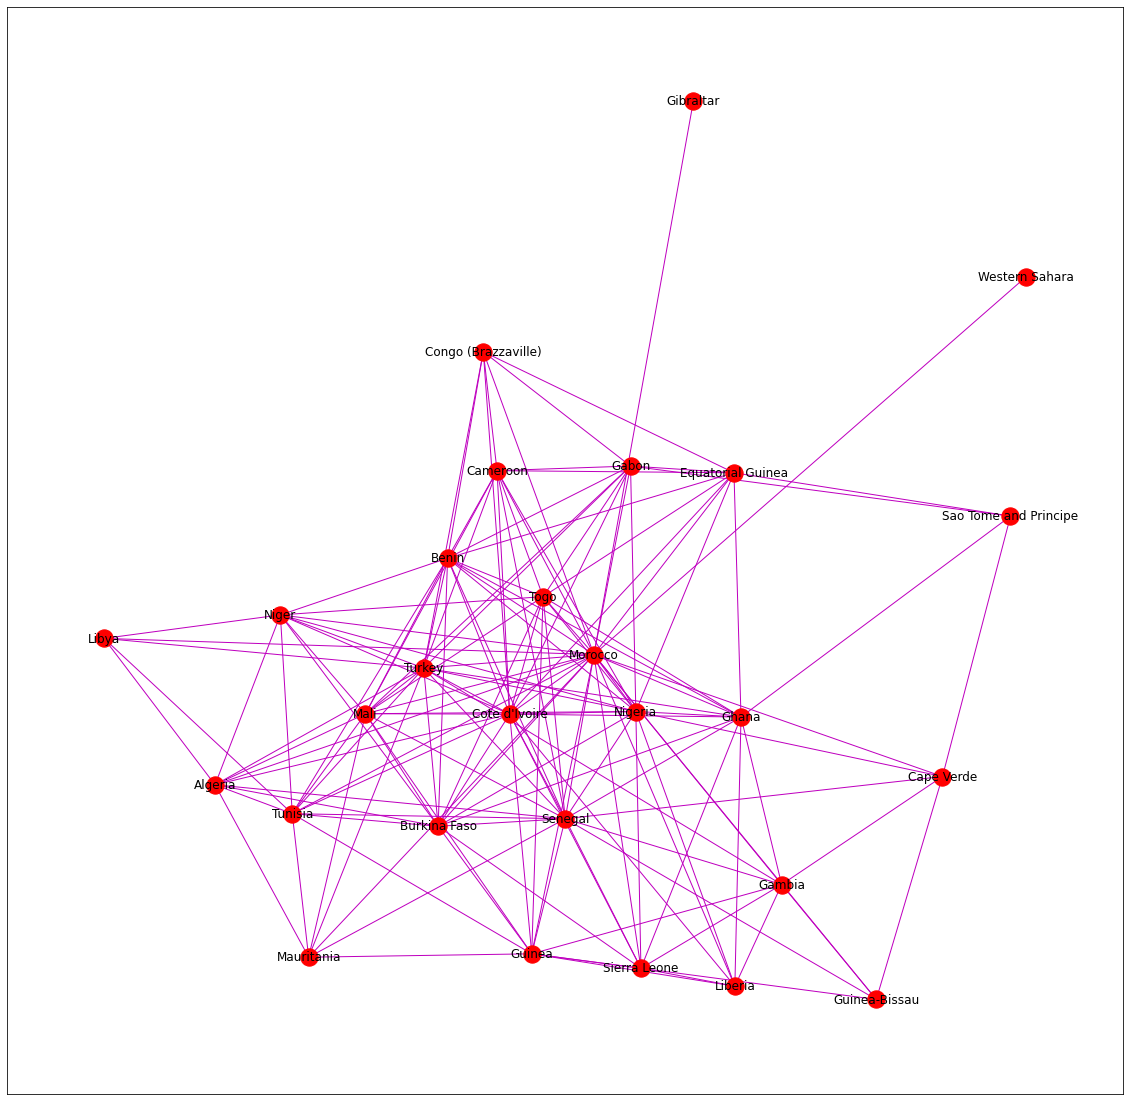

In [21]:
visualizar_comunidades(sub_communities[0],0,'r')

Visualizacion Comunidad: 1 



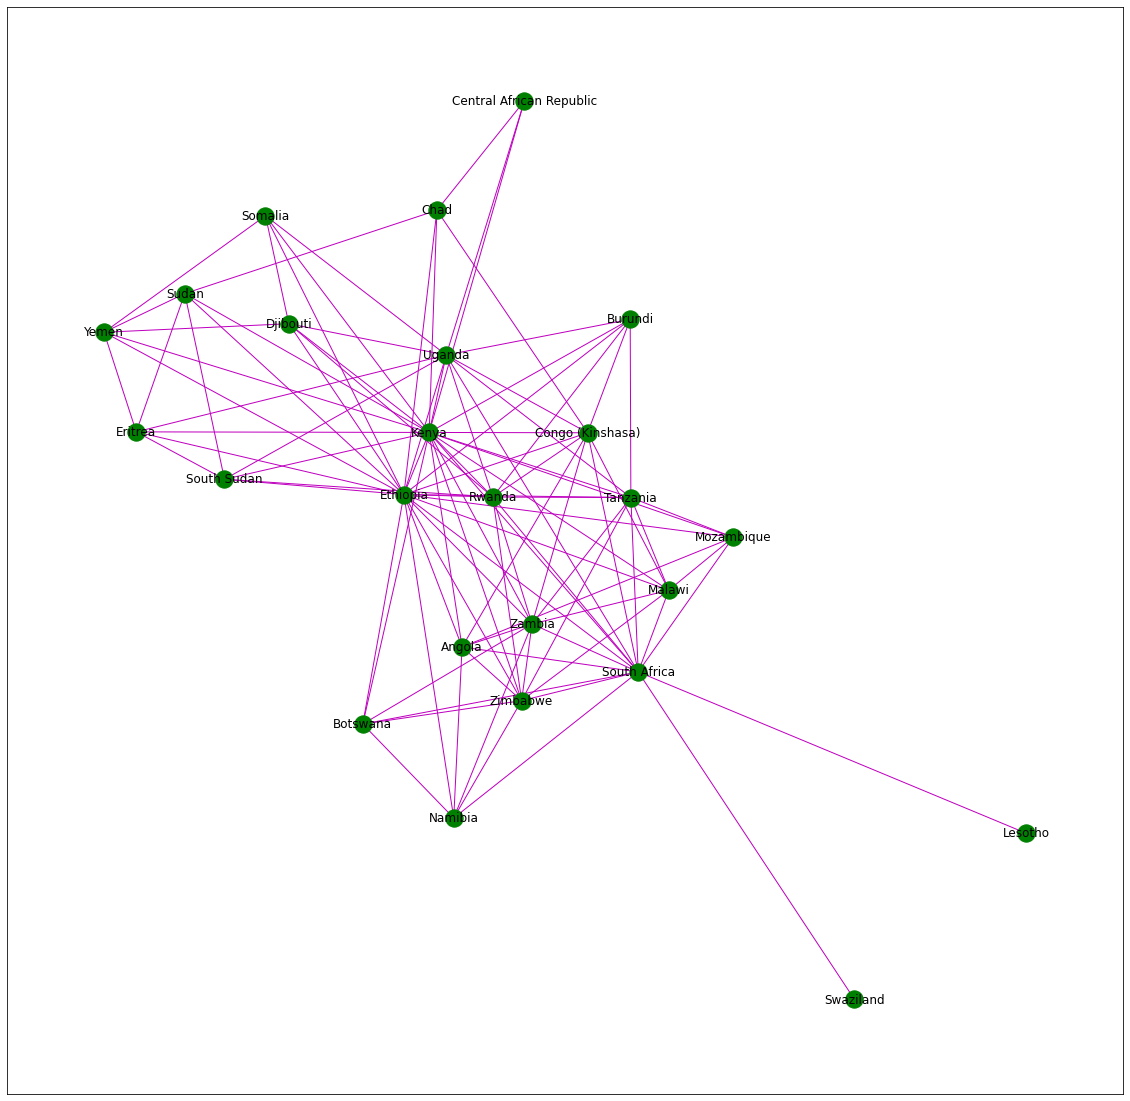

In [22]:
visualizar_comunidades(sub_communities[1],1,'g')

MOTIFS 

MOTIF DE HASTA 5 NODOS --------> SUBRED : COMUNIDAD 0

In [24]:
from motifs.calculos import calcular_motifs, significance_profile, motif_grafo_eleatorios
from metricas import distribucion_grados
from modelos import configuration_model
from motifs.graficos import graficar_significant_profile

In [27]:
MAX_NODOS_MOTIFS = 5
motifs = calcular_motifs(subgraph, MAX_NODOS_MOTIFS)
print(motifs)

[  4610   1097  21843  23738   1788  28891   8474   1842  77459 187717
  86472 107532  90819 194761   2027  44731 173148  30449  87026   1530
  24010  21127  79459  65453   9284  48121   6220  13206   1993]


In [29]:
dist = distribucion_grados(subgraph)
promedios, stds = motif_grafo_eleatorios(lambda: configuration_model(dist), MAX_NODOS_MOTIFS, iters=20)
SP = significance_profile(motifs, promedios, stds)
print("SP:", SP)

Iteracion 1
Iteracion 2; anterior: 302.18 segs
Iteracion 3; anterior: 265.14 segs
Iteracion 4; anterior: 321.47 segs
Iteracion 5; anterior: 609.09 segs
Iteracion 6; anterior: 982.81 segs
Iteracion 7; anterior: 307.94 segs
Iteracion 8; anterior: 441.69 segs
Iteracion 9; anterior: 337.72 segs
Iteracion 10; anterior: 362.22 segs
Iteracion 11; anterior: 321.43 segs
Iteracion 12; anterior: 351.38 segs
Iteracion 13; anterior: 1014.16 segs
Iteracion 14; anterior: 306.79 segs
Iteracion 15; anterior: 310.71 segs
Iteracion 16; anterior: 309.22 segs
Iteracion 17; anterior: 315.90 segs
Iteracion 18; anterior: 251.23 segs


Traceback (most recent call last):
  File "/Users/paulabruck/Library/Python/3.8/lib/python/site-packages/numpy/core/__init__.py", line 22, in <module>
Traceback (most recent call last):
  File "/Users/paulabruck/Library/Python/3.8/lib/python/site-packages/numpy/core/__init__.py", line 22, in <module>
    from . import multiarray
  File "/Users/paulabruck/Library/Python/3.8/lib/python/site-packages/numpy/core/multiarray.py", line 12, in <module>
    from . import overrides
  File "/Users/paulabruck/Library/Python/3.8/lib/python/site-packages/numpy/core/overrides.py", line 7, in <module>
    from numpy.core._multiarray_umath import (
ImportError: dlopen(/Users/paulabruck/Library/Python/3.8/lib/python/site-packages/numpy/core/_multiarray_umath.cpython-38-darwin.so, 2): no suitable image found.  Did find:
	/Users/paulabruck/Library/Python/3.8/lib/python/site-packages/numpy/core/_multiarray_umath.cpython-38-darwin.so: mach-o, but wrong architecture
	/Users/paulabruck/Library/Python/3.8/lib/

Iteracion 19; anterior: 134.62 segs


Traceback (most recent call last):
  File "/Users/paulabruck/Library/Python/3.8/lib/python/site-packages/numpy/core/__init__.py", line 22, in <module>
    from . import multiarray
  File "/Users/paulabruck/Library/Python/3.8/lib/python/site-packages/numpy/core/multiarray.py", line 12, in <module>
    from . import overrides
  File "/Users/paulabruck/Library/Python/3.8/lib/python/site-packages/numpy/core/overrides.py", line 7, in <module>
    from numpy.core._multiarray_umath import (
ImportError: dlopen(/Users/paulabruck/Library/Python/3.8/lib/python/site-packages/numpy/core/_multiarray_umath.cpython-38-darwin.so, 2): no suitable image found.  Did find:
	/Users/paulabruck/Library/Python/3.8/lib/python/site-packages/numpy/core/_multiarray_umath.cpython-38-darwin.so: mach-o, but wrong architecture
	/Users/paulabruck/Library/Python/3.8/lib/python/site-packages/numpy/core/_multiarray_umath.cpython-38-darwin.so: mach-o, but wrong architecture

During handling of the above exception, another

KeyboardInterrupt: 

In [ ]:
graficar_significant_profile(SP, 'Red de Vuelos')

ROLES

ROLES DENTRO SE SUBRED: COMUNIDAD 0

In [31]:
from graphrole import RecursiveFeatureExtractor, RoleExtractor

ImportError: dlopen(/Users/paulabruck/Library/Python/3.8/lib/python/site-packages/scipy/_lib/_ccallback_c.cpython-38-darwin.so, 2): no suitable image found.  Did find:
	/Users/paulabruck/Library/Python/3.8/lib/python/site-packages/scipy/_lib/_ccallback_c.cpython-38-darwin.so: mach-o, but wrong architecture
	/Users/paulabruck/Library/Python/3.8/lib/python/site-packages/scipy/_lib/_ccallback_c.cpython-38-darwin.so: mach-o, but wrong architecture

In [ ]:
def extract_roles_and_plot(G, title='',save = False ,file_name='', big=False):
    feature_extractor = RecursiveFeatureExtractor(G)
    features = feature_extractor.extract_features()
    role_extractor = RoleExtractor(n_roles=None)
    role_extractor.extract_role_factors(features)
    labels = {node: G.nodes()[node]['name'] for node in G.nodes()}

    available_colors = {'role_0':'#E9D758', 'role_1':'#297373', 'role_2':'#ff8552', 'role_3':'#888888', 'role_4':'#00aa00','role_5':'#aaaa00','role_6':'#aa0000' , 'role_7':'#0000aa'}
    
    colors = [available_colors[role_extractor.roles[node]] for node in G.nodes()]
    
    pos = nx.kamada_kawai_layout(G)
    if big:
        plt.figure(figsize=(15,15))
    else:
        plt.figure(figsize=(10,10))
    plt.title(title)

    nx.draw_networkx_nodes(G, pos, nodelist=G.nodes(), node_color=colors, alpha=0.7, node_size=700, linewidths=2)
    nx.draw_networkx_edges(G, pos, width=0.3, alpha=0.5)
    nx.draw_networkx_labels(G, pos, labels=labels)
    
    if save:
        plt.savefig(file_name, format = 'svg', dpi=300)

In [ ]:
extract_roles_and_plot(fligh,title='Roles en Red de Vuelos', save=False, file_name='img/roles_ep4.svg')